In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [120]:
data = pd.read_csv('./data/movie.csv')
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [121]:
len(data['text'])

40000

<Axes: title={'center': 'Count Review'}>

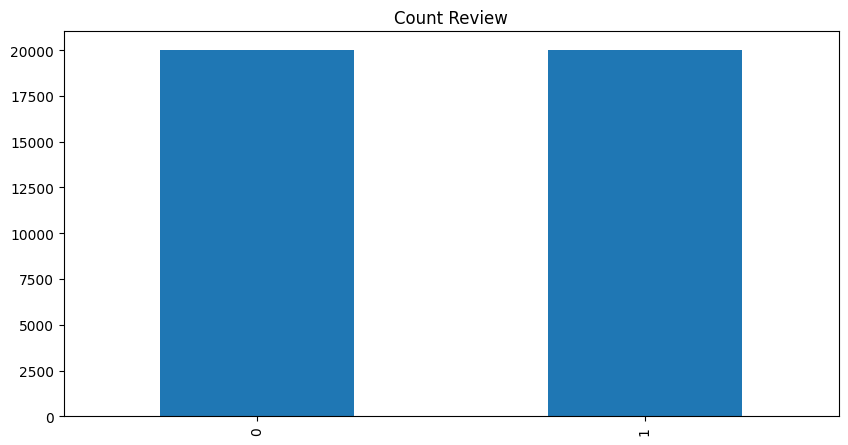

In [122]:
data['label'].value_counts().sort_index().plot(kind='bar', title='Count Review', figsize=(10,5))

# Preprocessing

## Cleansing

In [123]:
non_alphabet_list = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.',
                     '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`',
                     '{', '|', '}', '~', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def remove(text):
  for char in non_alphabet_list:
        text = text.replace(char, '')
  return text

data['text'] = data['text'].apply(remove)
data.head()

,text,label
0,I grew up b watching and loving the Thunderbi...,0
1,When I put this movie in my DVD player and sat...,0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


## Case Folding

In [124]:
data['text'] = data['text'].str.lower()
data.head()

,text,label
0,i grew up b watching and loving the thunderbi...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


## Tokenization

In [125]:
data['text'] = data['text'].str.split()
data.head()

,text,label
0,"[i, grew, up, b, watching, and, loving, the, t...",0
1,"[when, i, put, this, movie, in, my, dvd, playe...",0
2,"[why, do, people, who, do, not, know, what, a,...",0
3,"[even, though, i, have, great, interest, in, b...",0
4,"[im, a, die, hard, dads, army, fan, and, nothi...",1


## Stopwords (https://gist.github.com/sebleier/554280)

In [126]:
stopwords = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac",
             "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected",
             "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all",
             "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst",
             "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything",
             "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately",
             "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au",
             "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be",
             "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings",
             "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill",
             "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c",
             "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain",
             "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes",
             "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could",
             "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz",
             "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn",
             "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards",
             "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect",
             "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough",
             "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody",
             "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi",
             "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows",
             "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore",
             "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going",
             "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn",
             "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter",
             "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither",
             "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6",
             "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate",
             "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information",
             "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd",
             "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept",
             "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le",
             "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look",
             "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean",
             "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more",
             "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na",
             "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never",
             "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor",
             "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously",
             "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto",
             "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over",
             "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas",
             "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible",
             "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud",
             "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re",
             "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research",
             "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt",
             "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section",
             "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf",
             "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown",
             "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm",
             "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp",
             "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such",
             "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten",
             "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves",
             "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto",
             "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this",
             "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip",
             "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's",
             "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely",
             "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value",
             "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn",
             "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what",
             "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's",
             "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose",
             "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn",
             "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you",
             "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",
            ]

In [129]:
def remove_stopwords(words):
    result = []
    for word in words:
        if word not in stopwords:
            result.append(word)
    return ' '.join(result)

data['text'] = data['text'].apply(remove_stopwords)
data.head()

,text,label
0,grew watching loving thunderbirds mates school...,0
1,movie dvd player sat coke chips expectations h...,0
2,people time feel define time replace woodstock...,0
3,great biblical movies bored death minute movie...,0
4,die hard dads army fan change tapes dvds audio...,1


## Stemming

In [130]:
import nltk
from nltk.stem import PorterStemmer

Apply the tokenization again for stemming process

In [131]:
data['text'] = data['text'].str.split()
data.head()

,text,label
0,"[grew, watching, loving, thunderbirds, mates, ...",0
1,"[movie, dvd, player, sat, coke, chips, expecta...",0
2,"[people, time, feel, define, time, replace, wo...",0
3,"[great, biblical, movies, bored, death, minute...",0
4,"[die, hard, dads, army, fan, change, tapes, dv...",1


In [132]:
def apply_stemming(tokens):
    stemmed_words = []
    for word in tokens:
        stemmed_words.append(PorterStemmer().stem(word))
    return ' '.join(stemmed_words)

data['text'] = data['text'].apply(apply_stemming)
data.head()

,text,label
0,grew watch love thunderbird mate school watch ...,0
1,movi dvd player sat coke chip expect hope movi...,0
2,peopl time feel defin time replac woodstock ci...,0
3,great biblic movi bore death minut movi bad mo...,0
4,die hard dad armi fan chang tape dvd audiobook...,1


# TF-IDF (https://github.com/mayank408/TFIDF)

In [133]:
data['text'] = data['text'].str.split()
data.head()

,text,label
0,"[grew, watch, love, thunderbird, mate, school,...",0
1,"[movi, dvd, player, sat, coke, chip, expect, h...",0
2,"[peopl, time, feel, defin, time, replac, woods...",0
3,"[great, biblic, movi, bore, death, minut, movi...",0
4,"[die, hard, dad, armi, fan, chang, tape, dvd, ...",1


In [134]:
train = int(len(data) * 0.7)
test = int(len(data) * 0.3)

### Train

In [135]:
train_data = data.head(train)

In [136]:
train_data

,text,label
0,"[grew, watch, love, thunderbird, mate, school,...",0
1,"[movi, dvd, player, sat, coke, chip, expect, h...",0
2,"[peopl, time, feel, defin, time, replac, woods...",0
3,"[great, biblic, movi, bore, death, minut, movi...",0
4,"[die, hard, dad, armi, fan, chang, tape, dvd, ...",1
...,...,...
27995,"[british, potboil, thing, young, men, uniforml...",0
27996,"[want, holm, door, pun, string, suitabl, grubb...",0
27997,"[topnotch, movi, topnotch, cast, danni, glover...",1
27998,"[feel, strang, guilti, fairli, welleduc, nonte...",1


### Test

In [137]:
test_data = data.tail(test)

In [138]:
test_data

,text,label
28000,"[movi, feel, matter, dayskind, plan, outer, sp...",1
28001,"[histori, nut, interest, histor, event, disapp...",0
28002,"[time, psycho, toy, maker, name, joe, petto, l...",0
28003,"[great, movi, watch, good, friend, boygirl, fr...",1
28004,"[dramat, licens, hate, retel, life, stori, cas...",1
...,...,...
39995,"[western, union, forgotten, classic, western, ...",1
39996,"[movi, incred, piec, work, explor, nook, crann...",1
39997,"[wife, watch, movi, plan, visit, sicili, strom...",0
39998,"[watch, flatlin, amaz, featur, good, movi, cas...",1


### Frasa

In [139]:
train_data_exploded = train_data.explode('text')

In [140]:
unique_values = train_data_exploded['text'].unique()

In [141]:
print(unique_values)

['grew' 'watch' 'love' ... 'marketingy' 'lakeb' 'divebomb']


In [142]:
wordSet = unique_values

In [143]:
wordSet

array(['grew', 'watch', 'love', ..., 'marketingy', 'lakeb', 'divebomb'],
      dtype=object)

In [144]:
wordDict = dict.fromkeys(wordSet, 0)

In [145]:
wordDict

{'grew': 0,
 'watch': 0,
 'love': 0,
 'thunderbird': 0,
 'mate': 0,
 'school': 0,
 'play': 0,
 'lunch': 0,
 'want': 0,
 'virgil': 0,
 'scott': 0,
 'alan': 0,
 'count': 0,
 'art': 0,
 'form': 0,
 'children': 0,
 'movi': 0,
 'hope': 0,
 'glimps': 0,
 'child': 0,
 'bitterli': 0,
 'disappoint': 0,
 'high': 0,
 'point': 0,
 'snappi': 0,
 'theme': 0,
 'tune': 0,
 'compar': 0,
 'origin': 0,
 'score': 0,
 'thank': 0,
 'earli': 0,
 'saturday': 0,
 'morn': 0,
 'televis': 0,
 'channel': 0,
 'rerun': 0,
 'seri': 0,
 'gerri': 0,
 'anderson': 0,
 'wife': 0,
 'creat': 0,
 'jonatha': 0,
 'frake': 0,
 'hand': 0,
 'director': 0,
 'chair': 0,
 'version': 0,
 'complet': 0,
 'hopeless': 0,
 'wast': 0,
 'film': 0,
 'utter': 0,
 'rubbish': 0,
 'cgi': 0,
 'remak': 0,
 'accept': 0,
 'replac': 0,
 'marionett': 0,
 'homo': 0,
 'sapien': 0,
 'subsp': 0,
 'huge': 0,
 'error': 0,
 'judgment': 0,
 'dvd': 0,
 'player': 0,
 'sat': 0,
 'coke': 0,
 'chip': 0,
 'expect': 0,
 'strongpoint': 0,
 'awsom': 0,
 'anim': 0,
 'g

In [146]:
len(wordDict)

97326

## Frequency

In [147]:
for index, row in data.iterrows():
    for word in row['text']:
        if word in wordDict:
            wordDict[word] += 1
        else:
            continue

In [148]:
wordDict

{'grew': 368,
 'watch': 21823,
 'love': 14318,
 'thunderbird': 68,
 'mate': 267,
 'school': 2730,
 'play': 13631,
 'lunch': 103,
 'want': 2645,
 'virgil': 22,
 'scott': 856,
 'alan': 463,
 'count': 758,
 'art': 2286,
 'form': 1436,
 'children': 2353,
 'movi': 79383,
 'hope': 3598,
 'glimps': 337,
 'child': 1824,
 'bitterli': 33,
 'disappoint': 2813,
 'high': 3092,
 'point': 6132,
 'snappi': 66,
 'theme': 1891,
 'tune': 526,
 'compar': 1682,
 'origin': 5978,
 'score': 1939,
 'thank': 384,
 'earli': 2472,
 'saturday': 337,
 'morn': 441,
 'televis': 1398,
 'channel': 902,
 'rerun': 149,
 'seri': 4988,
 'gerri': 38,
 'anderson': 345,
 'wife': 3092,
 'creat': 2576,
 'jonatha': 1,
 'frake': 9,
 'hand': 3003,
 'director': 7362,
 'chair': 279,
 'version': 3424,
 'complet': 4881,
 'hopeless': 172,
 'wast': 3434,
 'film': 73600,
 'utter': 495,
 'rubbish': 414,
 'cgi': 519,
 'remak': 1054,
 'accept': 1229,
 'replac': 532,
 'marionett': 8,
 'homo': 22,
 'sapien': 7,
 'subsp': 1,
 'huge': 1665,
 'e

In [149]:
len(wordDict)

97326

In [150]:
pd.DataFrame([wordDict])

,grew,watch,love,thunderbird,mate,school,play,lunch,want,virgil,...,bestsustain,meaningoh,reaganthatch,wobblecam,lloy,nonteenag,mka,marketingy,lakeb,divebomb
0,368,21823,14318,68,267,2730,13631,103,2645,22,...,1,1,1,1,1,1,2,1,1,1


## Term Frequency

In [151]:
total_words = sum(wordDict.values())

tf_dict = {}
for word, count in wordDict.items():
    tf_dict[word] = count / total_words


In [152]:
tf_dict

{'grew': 0.00010303052531289222,
 'watch': 0.006109878135606649,
 'love': 0.004008671362581497,
 'thunderbird': 1.903824924259965e-05,
 'mate': 7.475312570256039e-05,
 'school': 0.0007643297122396624,
 'play': 0.003816329050380527,
 'lunch': 2.883734811746712e-05,
 'want': 0.0007405319006864128,
 'virgil': 6.1594335784881225e-06,
 'scott': 0.00023965796105390147,
 'alan': 0.0001296280794018182,
 'count': 0.00021222048420427257,
 'art': 0.0006400211436556294,
 'form': 0.0004020430281231338,
 'children': 0.0006587794186446614,
 'movi': 0.02222519617096012,
 'hope': 0.0010073473643363755,
 'glimps': 9.435132345229532e-05,
 'child': 0.0005106730385073788,
 'bitterli': 9.239150367732183e-06,
 'disappoint': 0.0007875675752857767,
 'high': 0.0008656803920311488,
 'point': 0.0017168021228767803,
 'snappi': 1.8478300735464365e-05,
 'theme': 0.0005294313134964108,
 'tune': 0.00014726645737657965,
 'compar': 0.0004709166945007737,
 'origin': 0.0016736860878273634,
 'score': 0.0005428700776676577,

In [153]:
len(tf_dict)

97326

## IDF

In [155]:
import math

idf_dict = {}
total_documents = len(data['text'])

for word, count in wordDict.items():
    idf_dict[word] = math.log10(total_documents / (count + 1))

In [156]:
total_documents

40000

In [157]:
idf_dict

{'grew': 2.035033625168902,
 'watch': 0.2631256383515775,
 'love': 0.446147302242056,
 'thunderbird': 2.7632109005907073,
 'mate': 2.1739251972991736,
 'school': 1.165738291188229,
 'play': 0.4675004139053375,
 'lunch': 2.5850266520291822,
 'want': 1.1794701514764803,
 'virgil': 3.2403321553103694,
 'scott': 1.6690791694047642,
 'alan': 1.9355420107730814,
 'count': 1.721818215432482,
 'art': 1.242793826721214,
 'form': 1.4446032231937367,
 'children': 1.2302535328205466,
 'movi': -0.29767298701945366,
 'hope': 1.0458781446750511,
 'glimps': 2.073143291050308,
 'child': 1.340797122535469,
 'bitterli': 3.070581074285707,
 'disappoint': 1.1527358982292355,
 'high': 1.1116800713247834,
 'point': 0.8143870266404694,
 'snappi': 2.775985188627136,
 'theme': 1.3251388592621884,
 'tune': 1.8802493761154158,
 'compar': 1.3759758753521385,
 'origin': 0.8254314379078124,
 'score': 1.3142582613977363,
 'thank': 2.0165992618194615,
 'earli': 1.2088358749666652,
 'saturday': 2.073143291050308,
 'mor

In [158]:
len(idf_dict)

97326

## TF-IDF

In [159]:
tfIDF = {}

for word in wordSet:
  tfIDF[word] = tf_dict[word] * idf_dict[word]

In [160]:
tfIDF

{'grew': 0.00020967058343055136,
 'watch': 0.0016076655846818456,
 'love': 0.0017884579139907217,
 'thunderbird': 5.260669783531413e-05,
 'mate': 0.00016250770354166852,
 'school': 0.000891008412650655,
 'play': 0.0017841354106518598,
 'lunch': 7.454531345749607e-05,
 'want': 0.0008734352730757691,
 'virgil': 1.995861068287348e-05,
 'scott': 0.0004000081105770852,
 'alan': 0.00025090059345804787,
 'count': 0.0003654050953908178,
 'art': 0.0007954143263062675,
 'form': 0.0005807926542892492,
 'children': 0.0008104657071370606,
 'movi': -0.006615840531303023,
 'hope': 0.0010535625924554311,
 'glimps': 0.00019560381321684361,
 'child': 0.0006847089405871383,
 'bitterli': 2.836956026163827e-05,
 'disappoint': 0.0009078574163132708,
 'high': 0.000962359639957654,
 'point': 0.0013981413761796667,
 'snappi': 5.129548915264699e-05,
 'theme': 0.000701570006824316,
 'tune': 0.00027689766460504137,
 'compar': 0.0006479700109336377,
 'origin': 0.0013815131140816417,
 'score': 0.0007134714844403498

In [161]:
len(tfIDF)

97326